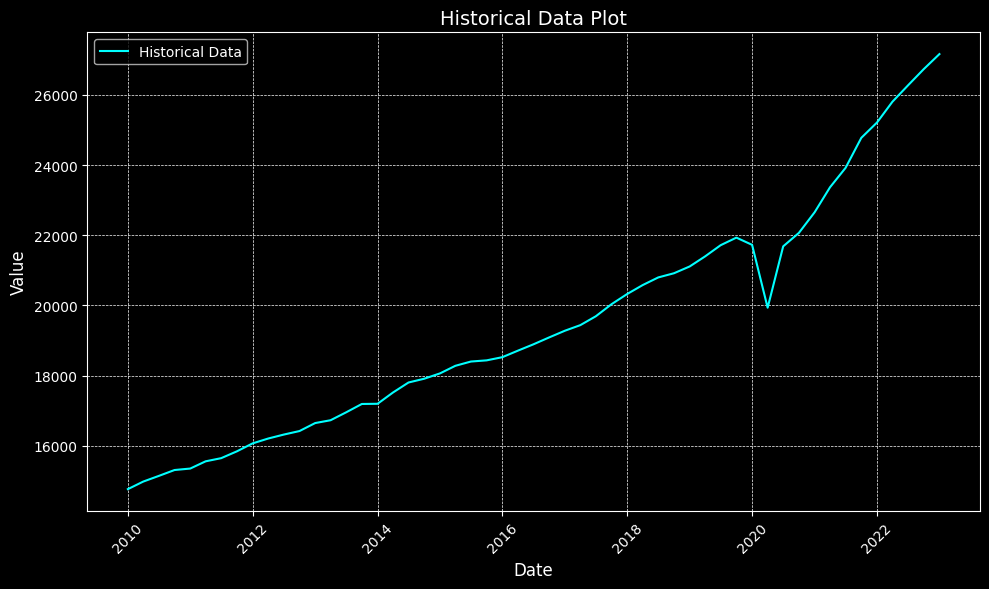

C:\Users\nilee\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\nilee\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\nilee\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


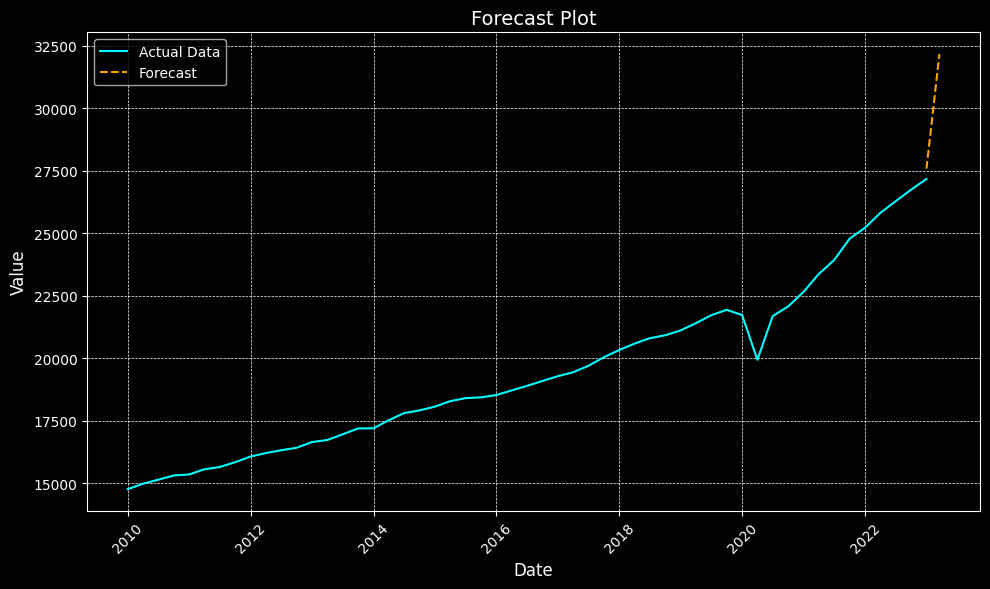

RMSE: 23815.004095839922


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import numpy as np
from fredapi import Fred

# Define your FRED API key here
fred_api_key = 'Enter Your Key'

# Function to pull the series from FRED
def pull_fred_series(series_id, start_date, end_date):
    """
    Pulls data for the given series ID from FRED using fredapi.
    Arguments:
    series_id: The identifier for the financial data on FRED
    start_date: Starting date for the data
    end_date: Ending date for the data
    
    Returns:
    A pandas Series with date as index and the values of the series.
    """
    fred = Fred(api_key=fred_api_key)
    data = fred.get_series(series_id, start_date, end_date)
    return data

# Function to plot the historical data
def plot_historical_data(series):
    """
    Plots historical data from a pandas series.
    Arguments:
    series: A pandas Series with a datetime index and numerical values.
    
    Returns:
    A plot displaying the historical data.
    """
    plt.style.use('dark_background')
    plt.figure(figsize=(10,6))
    plt.plot(series.index, series, label='Historical Data', color='cyan')
    plt.title('Historical Data Plot', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend(loc='upper left', fontsize=10)
    plt.tight_layout()
    plt.show()

# Function to perform ARIMA forecasting
def forecast_arima(series, forecast_steps=12, order=(1,1,1)):
    """
    Forecast future values using ARIMA.
    Arguments:
    series: A pandas Series with the data to be forecasted.
    forecast_steps: Number of periods to forecast.
    order: ARIMA order (p,d,q).
    
    Returns:
    A plot showing the actual data and forecasted values, and the RMSE of the forecast.
    """
    # Step 1: Test for stationarity and differencing if necessary
    def adf_test(series):
        result = adfuller(series)
        return result[1]  # Return p-value to check if stationary

    # Check stationarity and apply differencing if needed
    p_value = adf_test(series)
    if p_value > 0.05:
        series_diff = series.diff().dropna()
    else:
        series_diff = series

    # Step 2: Fit ARIMA model
    model = ARIMA(series_diff, order=order)
    model_fit = model.fit()

    # Step 3: Forecast
    forecast = model_fit.forecast(steps=forecast_steps)

    # Step 4: Plot the forecasted values
    plt.style.use('dark_background')
    plt.figure(figsize=(10,6))
    plt.plot(series.index, series, label='Actual Data', color='cyan')
    plt.plot(pd.date_range(series.index[-1], periods=forecast_steps, freq='W'), 
             forecast.cumsum() + series.iloc[-1], label='Forecast', color='orange', linestyle='--')
    plt.title('Forecast Plot', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend(loc='upper left', fontsize=10)
    plt.tight_layout()
    plt.show()

    # Step 5: Evaluate the forecast using RMSE
    rmse = np.sqrt(mean_squared_error(series[-forecast_steps:], forecast))
    print(f'RMSE: {rmse}')

# Example usage:
# Replace 'GDP' with the FRED series you want to analyze and enter your desired start/end dates
series_id = 'GDP'
start_date = '2010-01-01'
end_date = '2023-01-01'

# Pull the FRED data
data_series = pull_fred_series(series_id, start_date, end_date)

# Plot the historical data
plot_historical_data(data_series)

# Perform ARIMA forecasting
forecast_arima(data_series, forecast_steps=12, order=(1,1,1))
